In [1]:
def lfsr(p,seed):
    a=True
    wynik=0
    n=len(p)
    if len(seed) != n:
        a=False
        print('Niepoprawna dlugosc ciągów')
    while a:
        for i in range(len(p)): #nowy bit
             wynik=(wynik+p[i]*seed[i]) % 2
        for i in range(len(seed)-1): #przesuwanie
             seed[i]=seed[i+1]
        seed[len(seed)-1]=wynik
        yield seed[n-1]


In [2]:
j=0
wsp=[0,1,0,1,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0]
ziarno=[0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0]
for n in lfsr(wsp,ziarno):
    j+=1
    if j > 100: 
        break  
    print(n,end=" ")

1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 

In [3]:
from random import randint
import numpy as np

n=255 # seed length
state=[randint(0,1) for i in range(n)]
seed=[randint(0,1) for i in range(n)]

def generate_bytes(state,seed,count):
    i=0
    byte_lst=[]
    current_byte=0
    r=8
    for bit in lfsr(state,seed):
        if i>=count:
            break
        current_byte+=bit*2**(i%r)
        i+=1
        if i%r==0:
            byte_lst.append(current_byte)
            current_byte=0
    
    if i%r!=0:
        byte_lst.append(current_byte)
        current_byte=0
    return bytes(byte_lst)

In [4]:
import os
try:
    os.mkdir("./tmp")
except FileExistsError:
    pass
fname="./tmp/tmp.bin"

def write_bytes_to_file(byte_str):
    with open(fname,"wb+") as f:
        f.write(byte_str)

In [5]:
count=100000
b=generate_bytes(state,seed,count)

In [6]:
write_bytes_to_file(b)

In [7]:
!zip -r tmp.zip ./tmp

  adding: tmp/ (164 bytes security) (stored 0%)
  adding: tmp/tmp.bin (164 bytes security) (stored 0%)


ZIP algorithm is used to check the redundancy of generated bits:
1. 100000 bits are generated using LFSR
2. Bits are converted to bytes; bytes are written in a temporary file
3. The temporary file is compressed using ZIP algorithm (LZ77).
4. According to compression results, file tmp.bin that contains random bytes, is 0% deflated. => The redundancy of randomly generated bits is 0%
5. Therefore, LFSR is an efficient generator of random bytes 

In [8]:
from math import log2,ceil
def random_number_in_range(A,B):
    global state,seed
    assert int(A)<int(B)
    r0=0
    r1=int(B-A)
    bytes_to_generate=int(ceil(log2(r1)))
    b=generate_bytes(state,seed,bytes_to_generate)
    num=A+int.from_bytes(b,'little')
    if num>B:
        return random_number_in_range(A,B)
    return num

In [9]:
import matplotlib.pyplot as plt

In [10]:
count=10000
A=-1000
B=1000

In [11]:
def generate_and_plot_PDF(A,B,count,generated=None):
    if generated is not None:
        gen=generated
    else:
        gen=[random_number_in_range(A,B) for i in range(count)]
    plt.gcf().set_size_inches((5,3))
    plt.hist(gen,bins=20,density=True,label="LFSR generated random numbers PDF")
    plt.legend()
    plt.ylim(0,1.4/(B-A))

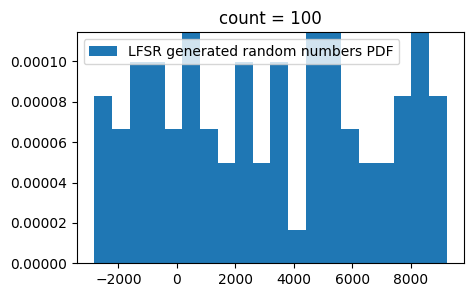

In [12]:
count=100
plt.title("count = %d"%count)
generate_and_plot_PDF(-2954,9277,count)
plt.show()

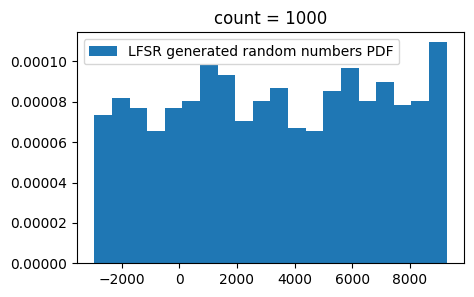

In [13]:
count=1000
plt.title("count = %d"%count)
generate_and_plot_PDF(-2954,9277,count)
plt.show()

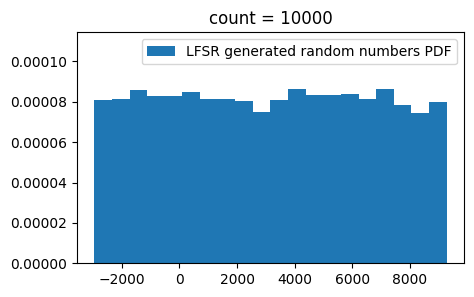

In [14]:
count=10000
plt.title("count = %d"%count)
generate_and_plot_PDF(-2954,9277,count)
plt.show()

In [15]:
def user_input():
    A=int(input("Input A: "))
    B=int(input("Input B: "))
    count=int(input("Numbers to generate: "))
    plot=input("Plot results? [Y/n]")[0] =='Y'
    #algorithm only for demonstration purposes. not optimized
    assert count<=10000
    if plot:
        gen=[random_number_in_range(A,B) for i in range(count)]
        plt.title("count = %d"%count)
        generate_and_plot_PDF(A,B,count,gen)
        plt.show()
    else:
        gen=[random_number_in_range(A,B) for i in range(count)]
    print('Generated numbers: ',gen[:500])
    

Input A: 15
Input B: 1723
Numbers to generate: 200
Plot results? [Y/n]Y


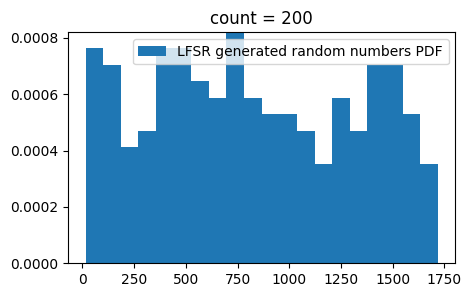

Generated numbers:  [614, 512, 470, 728, 280, 1419, 1658, 903, 998, 666, 1413, 891, 424, 350, 1638, 744, 1476, 146, 1440, 574, 1278, 276, 312, 1430, 1339, 1570, 1278, 364, 1460, 568, 1524, 1590, 1609, 714, 57, 1213, 26, 1452, 1080, 701, 1100, 268, 1493, 750, 374, 1120, 195, 471, 1495, 1029, 960, 1523, 20, 395, 566, 1217, 223, 731, 137, 1387, 253, 979, 537, 1190, 676, 883, 364, 27, 1577, 1559, 386, 785, 117, 881, 1486, 841, 596, 1261, 105, 1385, 1424, 867, 609, 40, 1366, 213, 809, 382, 480, 1549, 702, 1718, 206, 1631, 1063, 1389, 1277, 283, 1412, 647, 1497, 612, 1250, 598, 141, 307, 797, 1194, 92, 1700, 510, 1309, 224, 666, 765, 35, 403, 377, 376, 1277, 301, 991, 429, 151, 1214, 895, 450, 180, 52, 722, 1580, 544, 808, 854, 597, 1607, 814, 820, 325, 673, 1221, 523, 418, 37, 757, 137, 182, 705, 1129, 1533, 1335, 157, 1048, 737, 53, 1528, 952, 1156, 857, 901, 1164, 612, 999, 16, 449, 658, 1082, 1404, 1035, 501, 953, 1350, 1676, 527, 923, 1331, 1336, 1481, 851, 1695, 1091, 83, 733, 1071, 50

In [16]:
user_input()

In [17]:
user_input()

Input A: -1940
Input B: 4829
Numbers to generate: 273
Plot results? [Y/n]n
Generated numbers:  [3984, 1757, -1749, -404, 1679, -208, 330, 2220, 2469, -454, 4549, -1662, 4515, -1549, 2091, 933, -464, 1649, 4506, 722, 4581, 756, 2373, -238, 1835, 4122, 3060, -1659, -665, 3248, 1481, -1614, 2541, 547, 1452, 3655, 1511, -1354, -1152, 4504, 4093, 2895, 401, 810, 2452, 362, 1168, 4041, 1640, 2347, -1699, 4078, -1191, -198, -270, 2418, 513, 682, 2374, 4476, -1214, 627, 2530, 3720, 563, -1396, 2629, 2820, 2747, 2145, 152, -1203, 29, -1843, -15, 2462, 3423, 2730, 3532, 2929, 4462, -82, 620, 2363, -1330, 1212, 2750, 2885, -149, 4584, -1142, 3439, -1525, 3208, 309, -93, 4286, -1168, -1506, 75, 2528, 1169, 2895, 4374, 3759, 895, -1216, 2505, 1053, -1827, 2498, -1454, -477, 3073, 3053, 3483, 2221, -1743, 715, -1590, 2396, -1860, 2993, -963, 738, -452, 4396, 1527, 1225, 228, -1570, -1309, 4310, -244, 992, 2308, -1451, 1748, 1790, -643, 3717, 309, 3480, 357, 1508, 999, 1632, 1920, 3682, -1492, -266, 